In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
import scvelo as scv
import scanpy as sc
import re

SEED = 2024
np.random.seed(SEED)

os.chdir("/home/liyr/6_cellDancer_simulation")

In [2]:
vkey = {'velocyto':'velocity',
        'scvelo_stochastic':'velocity','scvelo_dynamical':'velocity',
        'veloAE':'new_velocity',
        'dynamo':'velocity_S',
        'veloVAE':'vae_velocity',
        'UniTVelo':'velocity',
        'DeepVeloSA':'velocity_dv',
        'cellDancer':'velocity_S',
        'veloVI':'velocity',
        'LatentVelo':'velo',
        'DeepVeloGB':'velocity',
        'STT':'velocity'}

method_palette = {
    "velocyto": "#D6272800",
    "scVelo(sto)": "#cab2d6ff",
    "scVelo(dyn)": "#6a3d9aff",
    "VeloAE": "#33a02cff",
    "dynamo": "#FFB547FF",
    "VeloVAE": "#b2df8aff",
    "UniTVelo": "#bcbd22ff",
    "DeepVelo(VAE)": "#1f78b4ff",
    "cellDancer": "#e377c2ff",
    "veloVI": "#ff9896ff",
    "LatentVelo": "#17BECFFF",
    "DeepVelo(GCN)": "#a6cee3ff",
    "STT": "#ff7f00ff",
    "MultiVelo": "#843C39FF",
    "PhyloVelo": "#E7CB94FF",
    "TFvelo": "#7B4173FF"
}

method_mapping = {
    "Dynamo_deterministic": "dynamo",
    "Velocyto": "velocyto",
    "scvelo_dynamical": "scVelo(dyn)",
    "scvelo_stochastic": "scVelo(sto)",
    "veloAE": "VeloAE",
    "Dynamo_stochastic|Dynamo": "dynamo",
    "veloVAE": "VeloVAE",
    "UniTvelo|UniteVelo": "UniTVelo",
    "DeepVelo_SA|DeepveloSA": "DeepVelo(VAE)",
    "Celldancer": "cellDancer",
    "Latentvelo": "LatentVelo",
    "DeepVelo_GB|DeepveloGB": "DeepVelo(GCN)",
    "stt": "STT",
    "multivelo": "MultiVelo",
    "phylovelo": "PhyloVelo",
    "tfvelo": "TFvelo"
}

def replace_method_name(method):
    for pattern, replacement in method_mapping.items():
        method = re.sub(pattern, replacement, method, flags=re.IGNORECASE)
    return method

# cell-level median

In [3]:
file_path = './1_simulation_datasets/'
file_list = os.listdir(file_path)
file_list = [file for file in file_list if file.endswith('.h5ad')]

result_path = './RNA_velocity_result/'
method_list = os.listdir(result_path)

df = pd.DataFrame(index=method_list,columns=file_list)

for file in file_list:
    print(file)
    adata_g = sc.read_h5ad('./1_simulation_datasets/' + file)

    for m in method_list:
        path = './RNA_velocity_result/' + m + "/" + file
        if os.path.exists(path):
            adata = sc.read_h5ad(path)
            
            cosine_sim_cell_matrix = cosine_similarity(adata.layers[vkey[m]],adata.layers['ground_truth_velocity'])
            cosine_sim_cell = np.diag(cosine_sim_cell_matrix)
            df.loc[m,file] = np.median(cosine_sim_cell)

df.to_csv('Eval/celldancer_cosine_sim.csv')

Transcriptional_boost_6.h5ad
Transcriptional_boost_3.h5ad
Transcriptional_boost_10.h5ad
Multi-backward_branching_5.h5ad
Transcriptional_boost_2.h5ad
Mono-kinetic_1.h5ad
Mono-kinetic_6.h5ad
Multi-forward_branching_4.h5ad
Multi-backward_branching_6.h5ad
Multi-forward_branching_3.h5ad
Multi-forward_branching_1.h5ad
Transcriptional_boost_5.h5ad
Mono-kinetic_8.h5ad
Mono-kinetic_5.h5ad
Multi-backward_branching_4.h5ad
Multi-backward_branching_10.h5ad
Multi-backward_branching_3.h5ad
Multi-forward_branching_10.h5ad
Multi-forward_branching_8.h5ad
Mono-kinetic_9.h5ad
Multi-backward_branching_7.h5ad
Mono-kinetic_3.h5ad
Multi-forward_branching_5.h5ad
Multi-forward_branching_2.h5ad
Multi-backward_branching_8.h5ad
Mono-kinetic_7.h5ad
Mono-kinetic_2.h5ad
Transcriptional_boost_8.h5ad
Transcriptional_boost_1.h5ad
Transcriptional_boost_9.h5ad
Mono-kinetic_4.h5ad
Transcriptional_boost_4.h5ad
Multi-forward_branching_7.h5ad
Multi-forward_branching_6.h5ad
Transcriptional_boost_7.h5ad
Mono-kinetic_10.h5ad
Mul

# draw boxplot

## cell level

Mono-kinetic_1.h5ad
scvelo_stochastic
scvelo_dynamical
cellDancer
dynamo
UniTVelo
DeepVeloSA
velocyto
DeepVeloGB
veloVI
LatentVelo
veloVAE
STT


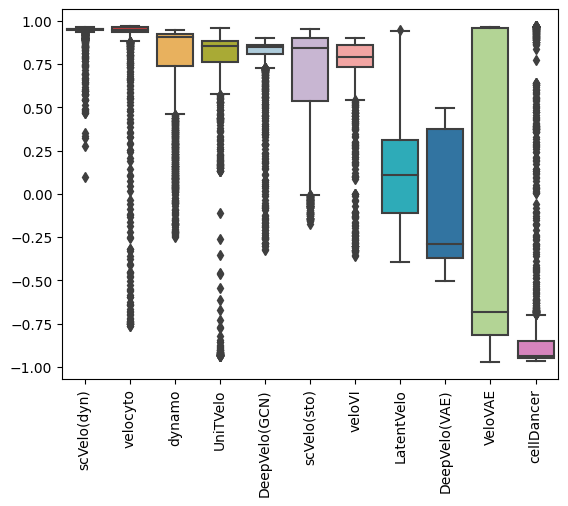

Transcriptional_boost_1.h5ad
scvelo_stochastic
scvelo_dynamical
cellDancer
dynamo
UniTVelo
DeepVeloSA
velocyto
DeepVeloGB
veloVI
LatentVelo
veloVAE
STT


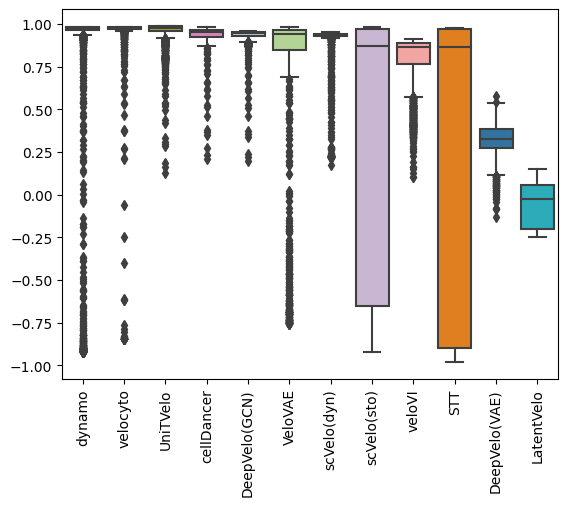

Multi-forward_branching_1.h5ad
scvelo_stochastic
scvelo_dynamical
cellDancer
dynamo
UniTVelo
DeepVeloSA
velocyto
DeepVeloGB
veloVI
LatentVelo
veloVAE
STT


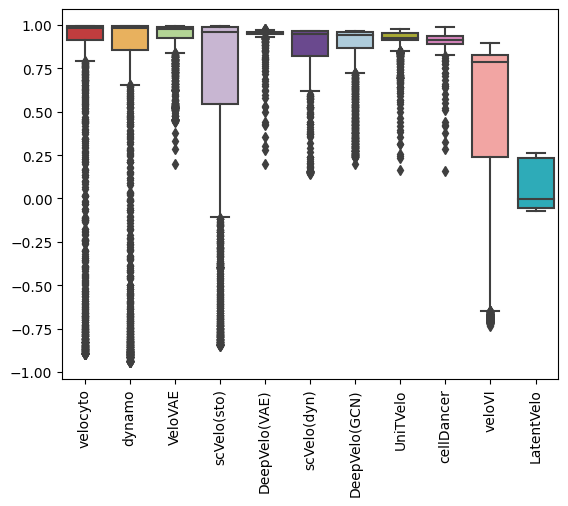

In [4]:
file_list = ['Mono-kinetic_1.h5ad','Transcriptional_boost_1.h5ad','Multi-forward_branching_1.h5ad']
result_path = './RNA_velocity_result/'
method_list = os.listdir(result_path)

for file in file_list:
    cell_cosine_sim_list = []
    method = []

    print(file)
    adata_g = sc.read_h5ad('./1_simulation_datasets/' + file)

    for m in method_list:
        print(m)
        path = './RNA_velocity_result/' + m + "/" + file
        if os.path.exists(path):
            method.append(m)

            adata = sc.read_h5ad(path)
            
            cosine_sim_cell_matrix = cosine_similarity(adata.layers[vkey[m]],adata.layers['ground_truth_velocity'])
            cosine_sim_cell = np.diag(cosine_sim_cell_matrix)
            cell_cosine_sim_list.append(cosine_sim_cell)
            

    df = pd.DataFrame(cell_cosine_sim_list).T
    df.columns = method
    
    df.columns = [replace_method_name(method) for method in df.columns]

    index_sort = df.median().sort_values(ascending=False).index
    df= df[index_sort]

    sns.boxplot(data=df,palette=method_palette)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.savefig('figures/Cell_level_'+ file + '.pdf',bbox_inches='tight')
    plt.show()

## gene level

Mono-kinetic_1.h5ad
scvelo_stochastic
scvelo_dynamical
cellDancer
dynamo
UniTVelo
DeepVeloSA
velocyto
DeepVeloGB
veloVI
LatentVelo
veloVAE
STT


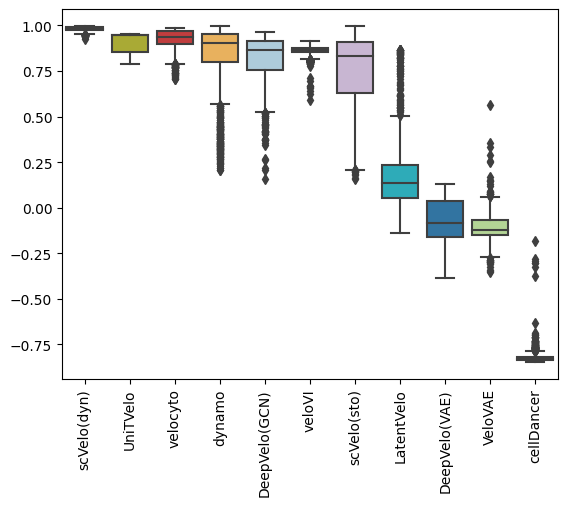

Transcriptional_boost_1.h5ad
scvelo_stochastic
scvelo_dynamical
cellDancer
dynamo
UniTVelo
DeepVeloSA
velocyto
DeepVeloGB
veloVI
LatentVelo
veloVAE
STT


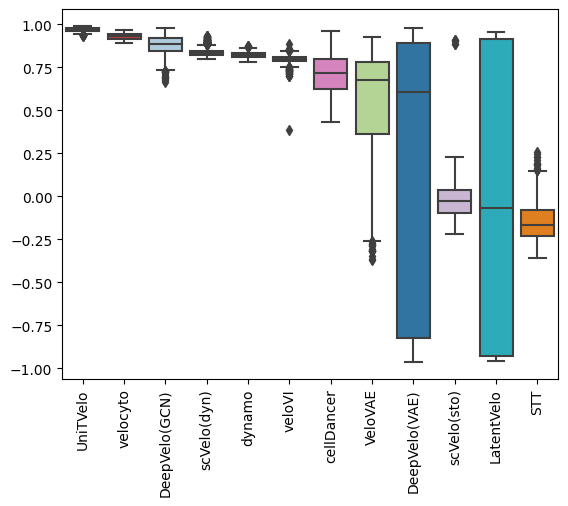

Multi-forward_branching_1.h5ad
scvelo_stochastic
scvelo_dynamical
cellDancer
dynamo
UniTVelo
DeepVeloSA
velocyto
DeepVeloGB
veloVI
LatentVelo
veloVAE
STT


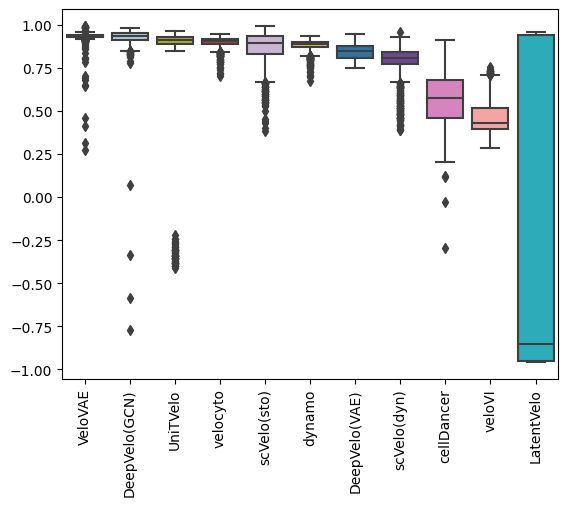

In [5]:
for file in file_list:
    cell_cosine_sim_list = []
    method = []

    print(file)
    adata_g = sc.read_h5ad('./1_simulation_datasets/' + file)

    for m in method_list:
        print(m)
        path = './RNA_velocity_result/' + m + "/" + file
        if os.path.exists(path):
            method.append(m)

            adata = sc.read_h5ad(path)
            
            cosine_sim_cell_matrix = cosine_similarity(adata.layers[vkey[m]].T,adata.layers['ground_truth_velocity'].T)
            cosine_sim_cell = np.diag(cosine_sim_cell_matrix)
            cell_cosine_sim_list.append(cosine_sim_cell)
            

    df = pd.DataFrame(cell_cosine_sim_list).T
    df.columns = method
    
    df.columns = [replace_method_name(method) for method in df.columns]

    index_sort = df.median().sort_values(ascending=False).index
    df= df[index_sort]

    sns.boxplot(data=df,palette=method_palette)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.savefig('figures/Gene_level_'+ file + '.pdf',bbox_inches='tight')
    plt.show()